In [1]:
import os
import glob
import cv2
import shutil
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from skimage import io 
import imageio
from shutil import copy2
from skimage import color
import pandas as pd
import random
import numpy as np

## DATASET PROCESSING

In [2]:
path=r"D:\SEM 8\Miniproject\CODE\Data"
if os.path.exists(path):
    shutil.rmtree(path)

In [3]:
path=r"D:\SEM 8\Miniproject\CODE\LFW"
if os.path.exists(path):
    shutil.rmtree(path)

In [4]:
Ori="D:\SEM 8\Miniproject\CODE\lfw-deepfunneled"
dest=r"D:\SEM 8\Miniproject\CODE\LFW"
shutil.copytree(Ori, dest, symlinks=False, ignore=None, copy_function=copy2, ignore_dangling_symlinks=False, dirs_exist_ok=False)

'D:\\SEM 8\\Miniproject\\CODE\\LFW'

In [5]:
folders=[]
sub_fol=[]
n=str(input("Enter the address of data: "))
os.chdir(n)
for i in os.listdir():
    folders.append(i)
for j in folders:
    k=n+j
    sub_fol.append(k)
#D:\SEM 8\Miniproject\CODE\LFW\

Enter the address of data: D:\SEM 8\Miniproject\CODE\LFW\


In [6]:
q=[]
for i in sub_fol:
    l=[]
    os.chdir(i)
    for files in os.listdir():
        l.append(files)  
    q.append([i,len(l)])

In [7]:
a=[]
b=[]
for i in range(len(q)):
    if q[i][1]>=10:
        a.append(q[i][0])
    else:
        b.append(q[i][0])

In [8]:
target=str(input('Enter target path:'))
os.mkdir(target)
for i in a:
    shutil.move(i,target)
#D:\SEM 8\Miniproject\CODE\Data

Enter target path:D:\SEM 8\Miniproject\CODE\Data


In [9]:
uk=[]
for i in b:
    os.chdir(i)
    for files in os.listdir():
        uk.append(i+'\\'+files)
target1=str(input('Enter the target path :'))
os.mkdir(target1)
for i in uk:
    shutil.move(i,target1)
shutil.move(target1,target)
#D:\SEM 8\Miniproject\CODE\Unknown\

Enter the target path :D:\SEM 8\Miniproject\CODE\Unknown\


'D:\\SEM 8\\Miniproject\\CODE\\Data\\Unknown'

In [7]:
def create_df():
    w=[]
    classes=[]
    uk=[]

    path=r'D:\SEM 8\Miniproject\CODE\Data'
    for files in os.listdir(path):
        for p in os.listdir(path+"\\"+files):
            w.append(path+"\\"+files+"\\"+p)
            classes.append(files)

    df=pd.DataFrame({'Image':w,'Class':classes})
    for i in range(len(df)):
        if df['Class'][i]=='Unknown':
            uk.append('Unknown')
        else:
            uk.append('Known')
    df['U/K']=uk
    return df

df=create_df()
df

,Image,Class,U/K
0,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\11...,Abdullah_Gul,Known
1,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\12...,Abdullah_Gul,Known
2,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\12...,Abdullah_Gul,Known
3,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\14...,Abdullah_Gul,Known
4,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\21...,Abdullah_Gul,Known
...,...,...,...
8036,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
8037,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
8038,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
8039,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='U/K', ylabel='count'>

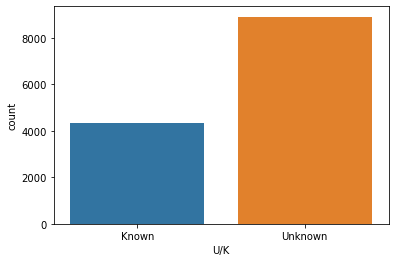

In [11]:
sns.countplot(df['U/K'])

In [12]:
print("Number of Known people:",len(df[df['U/K']=='Known']))

Number of Known people: 4324


In [13]:
print("Number of Unknown people:",len(df[df['U/K']=='Unknown']))

Number of Unknown people: 8909


In [14]:
df.shape

(13233, 3)

## IMAGE PREPROCESSING

In [15]:
img_ind=[]
for i in range(6):
    n=random.randint(0,13233) 
    img_ind.append(n)
img_ind

[607, 11095, 4578, 6107, 6897, 10828]

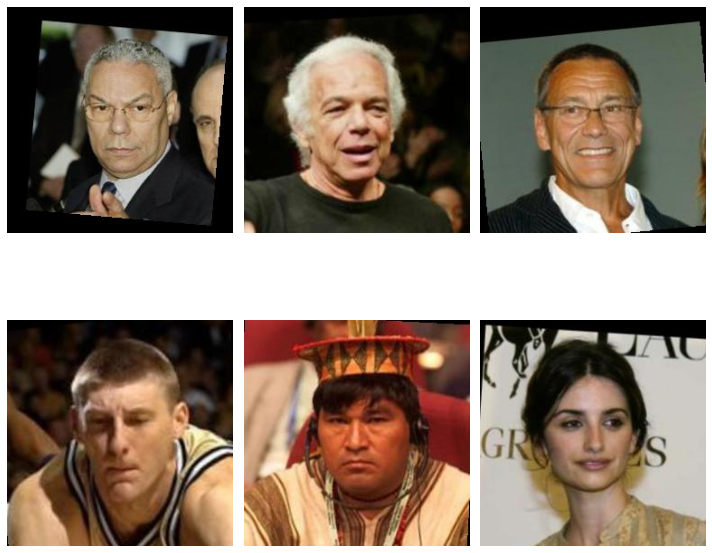

In [16]:
imgs=[]
for i in img_ind:
    imgs.append(df['Image'][i])
plt.figure(figsize=(10,10))
for i in range(len(imgs)):
    plt.subplot(2, 3, i + 1)
    img = plt.imread(imgs[i])
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()    

In [17]:
image = imageio.imread(imgs[0])
print("Array reprsentation of image:\n",image)

Array reprsentation of image:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [18]:
import imageio
for i in imgs:
    image = imageio.imread(i)
    print("The dimension of image is",image.shape[0],"X",image.shape[1],"and color channel is",image.shape[2])

The dimension of image is 250 X 250 and color channel is 3
The dimension of image is 250 X 250 and color channel is 3
The dimension of image is 250 X 250 and color channel is 3
The dimension of image is 250 X 250 and color channel is 3
The dimension of image is 250 X 250 and color channel is 3
The dimension of image is 250 X 250 and color channel is 3


## Image Augmentation

In [2]:
shutil.move(r"D:\SEM 8\Miniproject\CODE\Data\Unknown",r"D:\SEM 8\Miniproject\CODE")

'D:\\SEM 8\\Miniproject\\CODE\\Unknown'

In [4]:
##unique classes
path=r"D:\SEM 8\Miniproject\CODE\Data"
un_class=[]
for i in os.listdir(path):
    un_class.append(i)
un_class

['Abdullah_Gul',
 'Adrien_Brody',
 'Alejandro_Toledo',
 'Alvaro_Uribe',
 'Amelie_Mauresmo',
 'Andre_Agassi',
 'Andy_Roddick',
 'Angelina_Jolie',
 'Anna_Kournikova',
 'Ann_Veneman',
 'Ariel_Sharon',
 'Ari_Fleischer',
 'Arnold_Schwarzenegger',
 'Atal_Bihari_Vajpayee',
 'Bill_Clinton',
 'Bill_Gates',
 'Bill_McBride',
 'Bill_Simon',
 'Britney_Spears',
 'Carlos_Menem',
 'Carlos_Moya',
 'Catherine_Zeta-Jones',
 'Charles_Moose',
 'Colin_Powell',
 'Condoleezza_Rice',
 'David_Beckham',
 'David_Nalbandian',
 'Dick_Cheney',
 'Dominique_de_Villepin',
 'Donald_Rumsfeld',
 'Edmund_Stoiber',
 'Eduardo_Duhalde',
 'Fidel_Castro',
 'George_HW_Bush',
 'George_Robertson',
 'George_W_Bush',
 'Gerhard_Schroeder',
 'Gloria_Macapagal_Arroyo',
 'Gonzalo_Sanchez_de_Lozada',
 'Gordon_Brown',
 'Gray_Davis',
 'Guillermo_Coria',
 'Halle_Berry',
 'Hamid_Karzai',
 'Hans_Blix',
 'Harrison_Ford',
 'Hillary_Clinton',
 'Howard_Dean',
 'Hugo_Chavez',
 'Hu_Jintao',
 'Ian_Thorpe',
 'Igor_Ivanov',
 'Jackie_Chan',
 'Jack_Stra

In [21]:
df=df.loc[df['U/K']=='Known']
df

,Image,Class,U/K
0,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\Ab...,Abdullah_Gul,Known
1,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\Ab...,Abdullah_Gul,Known
2,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\Ab...,Abdullah_Gul,Known
3,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\Ab...,Abdullah_Gul,Known
4,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\Ab...,Abdullah_Gul,Known
...,...,...,...
13228,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
13229,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
13230,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
13231,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        samplewise_center=True, 
        samplewise_std_normalization= True)

In [8]:
generator=train_datagen.flow_from_dataframe(
    dataframe=df,
    x_col='Image',
    y_col='Class',
    target_size=(224, 224),
    color_mode='grayscale',
    classes=None,
    class_mode='categorical',
    batch_size=1,
    shuffle=True,
)

Found 8041 validated image filenames belonging to 159 classes.


Enter the path: D:\SEM 8\Miniproject\CODE\Data
30.jpg
D:\SEM 8\Miniproject\CODE\Data\Hugo_Chavez\30.jpg
31.jpg
D:\SEM 8\Miniproject\CODE\Data\Juan_Carlos_Ferrero\31.jpg
32.jpg
D:\SEM 8\Miniproject\CODE\Data\Ari_Fleischer\32.jpg
33.jpg
D:\SEM 8\Miniproject\CODE\Data\Walter_Mondale\33.jpg
34.jpg
D:\SEM 8\Miniproject\CODE\Data\Arnold_Schwarzenegger\34.jpg
35.jpg
D:\SEM 8\Miniproject\CODE\Data\Arnold_Schwarzenegger\35.jpg
36.jpg
D:\SEM 8\Miniproject\CODE\Data\Alejandro_Toledo\36.jpg
37.jpg
D:\SEM 8\Miniproject\CODE\Data\Michael_Bloomberg\37.jpg
38.jpg
D:\SEM 8\Miniproject\CODE\Data\Gerhard_Schroeder\38.jpg
39.jpg
D:\SEM 8\Miniproject\CODE\Data\Saddam_Hussein\39.jpg
310.jpg
D:\SEM 8\Miniproject\CODE\Data\Michael_Jackson\310.jpg
311.jpg
D:\SEM 8\Miniproject\CODE\Data\Nestor_Kirchner\311.jpg
312.jpg
D:\SEM 8\Miniproject\CODE\Data\Gloria_Macapagal_Arroyo\312.jpg
313.jpg
D:\SEM 8\Miniproject\CODE\Data\Colin_Powell\313.jpg
314.jpg
D:\SEM 8\Miniproject\CODE\Data\Atal_Bihari_Vajpayee\314.jpg
315.j

KeyboardInterrupt: 

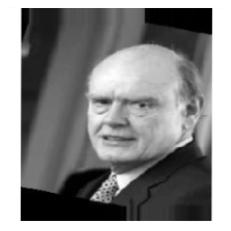

In [16]:
import cv2
path=str(input("Enter the path: "))
for j in range(500):
    img,label = generator.next()
    for i in label:
        k=i
    ind=np.where(k==1)
    l=ind[0][0]
    plt.imshow(img[0],cmap='gray')
    plt.axis('off')
    w="3"+str(j)+".jpg"
    print(w)
    new_path=path+"\\"+un_class[l]+"\\"+w
    plt.savefig(w,bbox_inches='tight')
    shutil.move(w,new_path)
    print(new_path)
#D:\SEM 8\Miniproject\CODE\Data

In [ ]:
30.jpg
D:\SEM 8\Miniproject\CODE\Data\Donald_Rumsfeld\30.jpg
31.jpg
D:\SEM 8\Miniproject\CODE\Data\Walter_Mondale\31.jpg
32.jpg
D:\SEM 8\Miniproject\CODE\Data\George_W_Bush\32.jpg
33.jpg
D:\SEM 8\Miniproject\CODE\Data\Bill_Clinton\33.jpg
34.jpg
D:\SEM 8\Miniproject\CODE\Data\George_W_Bush\34.jpg
35.jpg
D:\SEM 8\Miniproject\CODE\Data\John_Bolton\35.jpg

In [3]:
shutil.move(r"D:\SEM 8\Miniproject\CODE\Unknown",r"D:\SEM 8\Miniproject\CODE\Data")

'D:\\SEM 8\\Miniproject\\CODE\\Data\\Unknown'

In [17]:
df1=create_df()
df1

,Image,Class,U/K
0,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\11...,Abdullah_Gul,Known
1,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\12...,Abdullah_Gul,Known
2,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\12...,Abdullah_Gul,Known
3,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\14...,Abdullah_Gul,Known
4,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\21...,Abdullah_Gul,Known
...,...,...,...
10459,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
10460,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
10461,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
10462,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known


C:\Users\aashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='U/K', ylabel='count'>

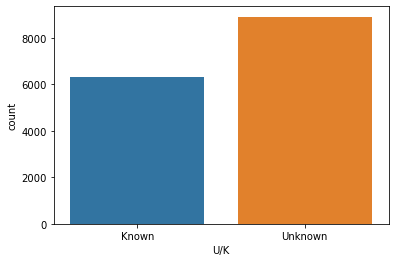

In [36]:
sns.countplot(df1['U/K'])

In [37]:
print("Number of Known people:",len(df1[df1['U/K']=='Known']))

Number of Known people: 6320


In [38]:
print("Number of Unknown people:",len(df1[df1['U/K']=='Unknown']))

Number of Unknown people: 8909
